# Lab 1: Operations on Single Qubit and Multiple Qubits Gates by IBM Quantum
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'enter'

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram


## 1.1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates. 

By default, states in qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises. (Press Shift + Enter to run a code cell)
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$. 

<div>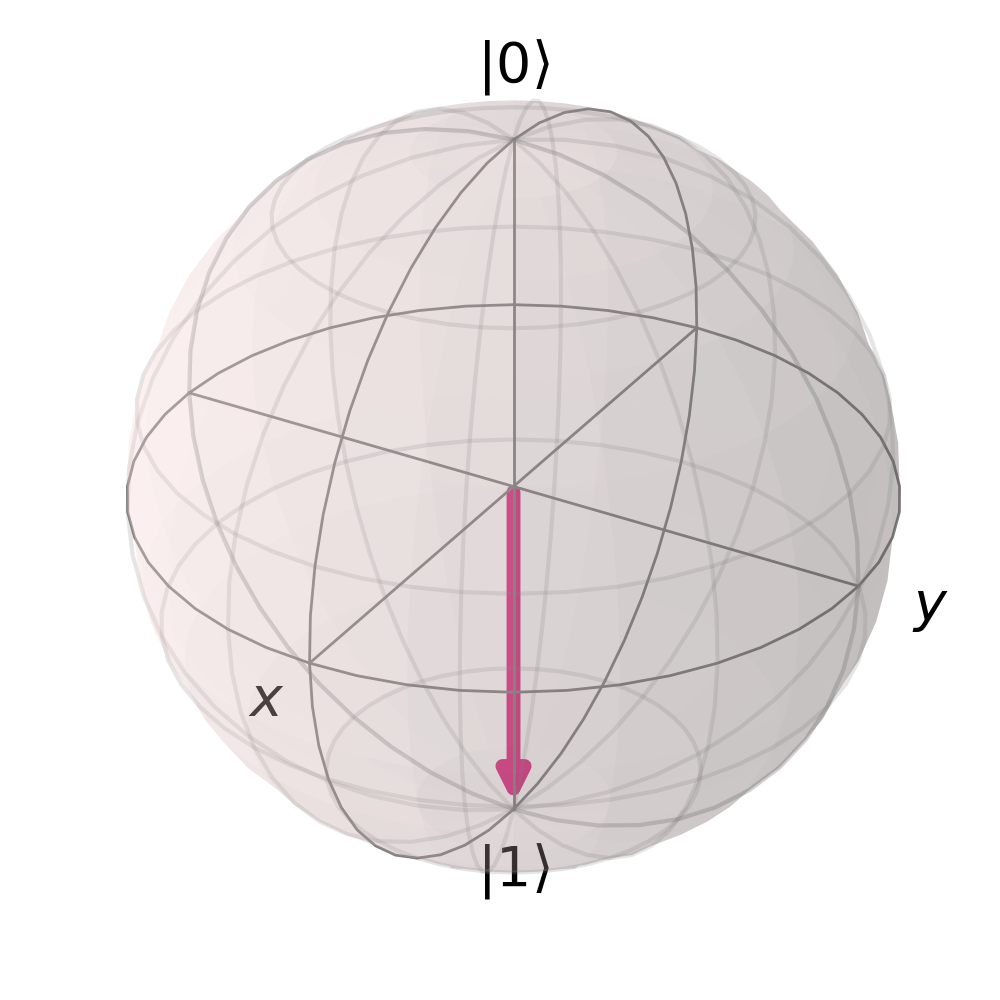</div>

In [ ]:
def lab1_ex1():
    qc = QuantumCircuit(1)
    #
    #
    qc.x(0)
    #
    #
    
    return qc

state = Statevector.from_instruction(lab1_ex1())
plot_bloch_multivector(state)

### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. 

<div>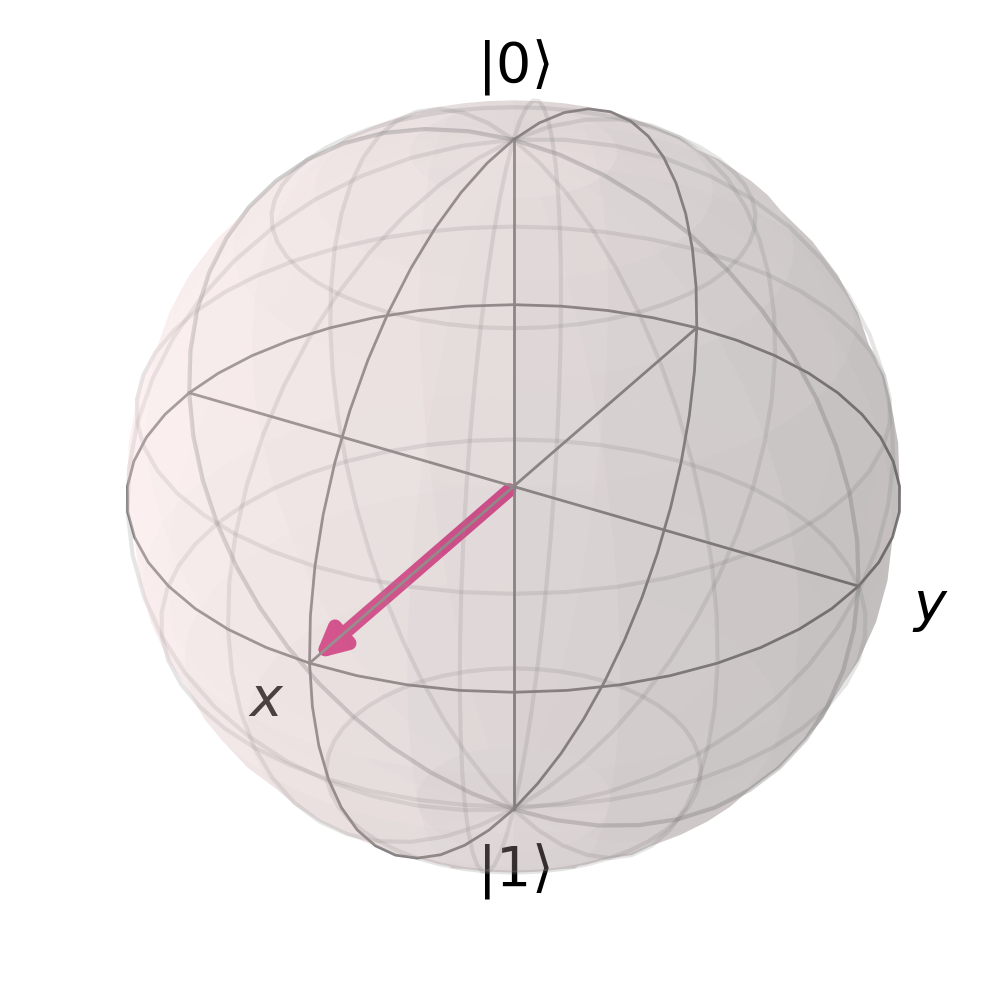</div>

In [ ]:
def lab1_ex2():
    qc = QuantumCircuit(1)
    #
    #
    qc.h(0)
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex2())
plot_bloch_multivector(state)

### 3.) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 

<div>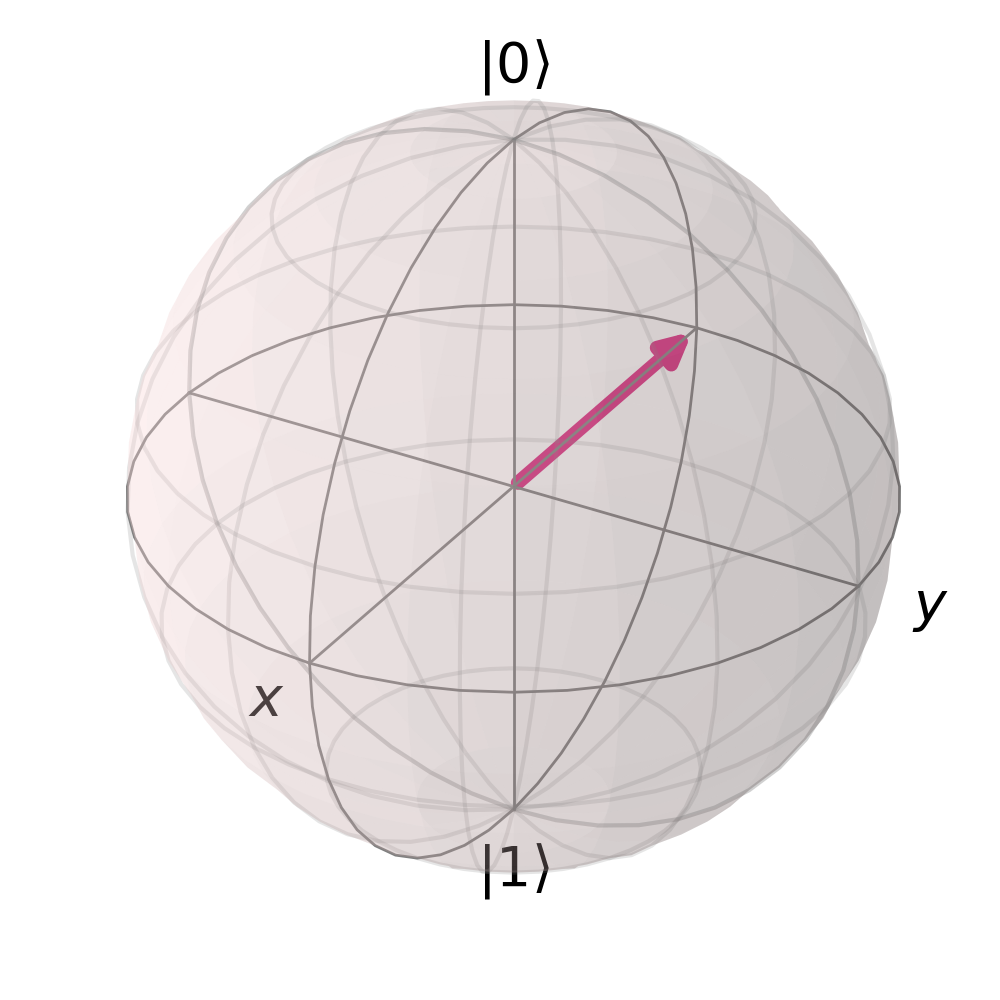</div>

Can you even come up with different ways?

In [ ]:
def lab1_ex3():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex3())
plot_bloch_multivector(state)

### 4.) Finally, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. 

<div><img src=attachment:leftstate.png width="200"></div>
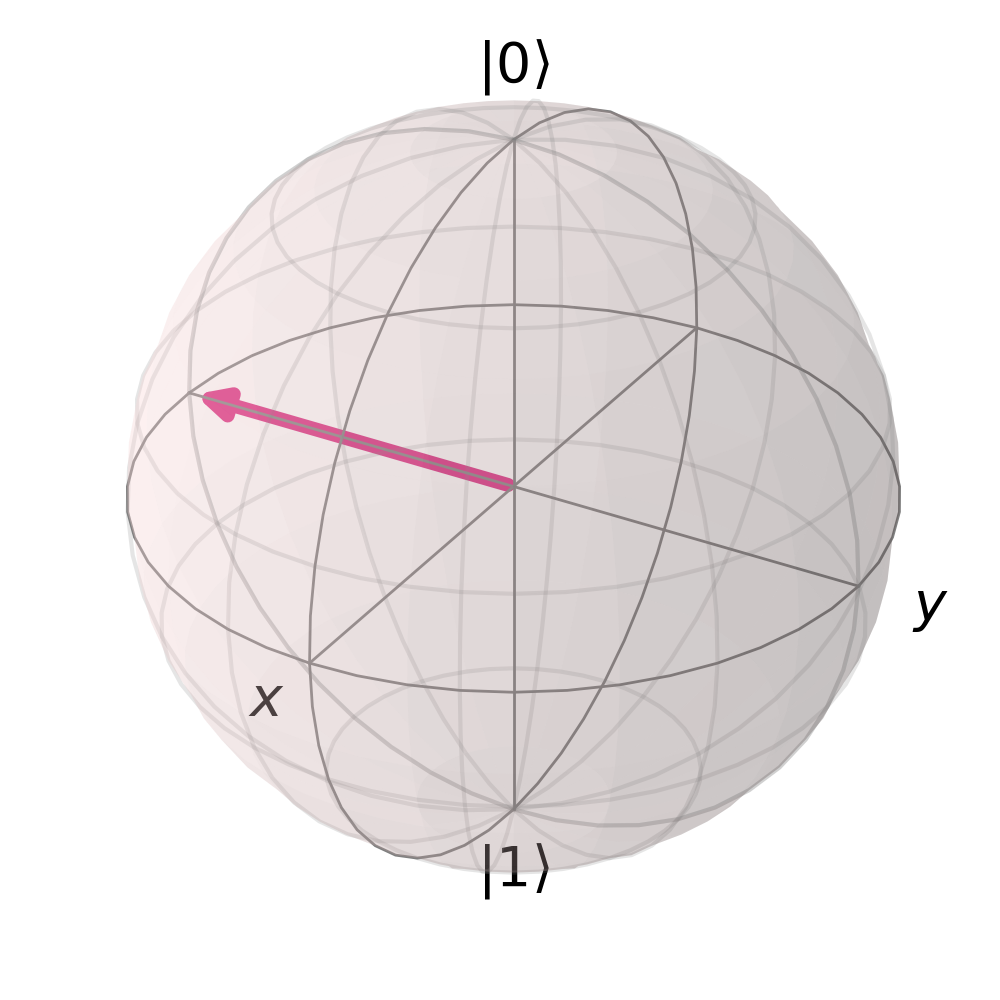

In [ ]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex4())
plot_bloch_multivector(state)

## 1.2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://qiskit.org/textbook/ch-gates/introduction.html. The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate . As it has no effect applied on two qubits in state $|0\rangle$, we apply a Hadamard gate before to bring the control qubit in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. 
### 5.) Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

In [ ]:
def lab1_ex5():
    qc = QuantumCircuit(2,2) # this time, we not only want two qubits, but also two classical bits for the measurement
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc = lab1_ex5()
qc.draw() # we draw the circuit

Let us now also add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

In [ ]:
qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = 1000)
counts = job.result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

As you can see in the histogram, the only possible outputs are "01" and "10", so the states of the two qubits are always perfectly anti-correlated.

### 6.) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|010\rangle - |101 \rangle \right)$.
Hint: the following circuit constructs the GHZ state, $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$:

<div>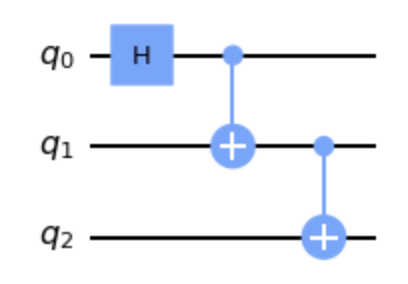</div>

In [ ]:
def lab1_ex6():
    #
    qc = QuantumCircuit(3,3)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc


qc = lab1_ex6()
qc.draw() # we draw the circuit

In [ ]:
qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
qc.measure(2, 2) # we perform a measurement on qubit q_2 and store the information on the classical bit c_2
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities